# Importing python libraries

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

# Loading the data

In [2]:
in13 = pd.read_csv("in13.csv", na_values = "NA")
in13.drop("Unnamed: 0", axis = 1, inplace = True)
in13.rename({"CodCliente": "codcliente"}, axis = 1, inplace = True)

un_mus = pd.read_excel("unallocated_museums.xlsx")
in13 = in13.merge(un_mus, how = "left", on = "museo")
in13.drop(["comune.museo","prov.museo"], axis = 1, inplace = True)
in13.head()

,datai,orai,importo,museo,prov_museo,com_museo,codcliente,tipo.museo
0,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
1,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
2,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
3,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
4,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte


# Converting the dates into datetime

In [3]:
a = pd.to_datetime(in13["datai"], format = "%d/%m/%Y")
b = pd.to_datetime(in13["orai"], format = "%H:%M")

# Renaming the files of columns

In [4]:
data=in13.rename(columns={"datai": "day_entrance", "orai": "time_entrance", "museo": "museum",
                     "importo": "amount", "museo":"museum",
                     "prov_museo": "city_museum", "com_museo": "comune_museum",
                     "codcliente":"cust_code", "tipo.museo" : "type"
                    })

# Exploratory data analysis

# Five top records of data

In [5]:
data.head()

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
0,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
1,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
2,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
3,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
4,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte


# Five last records of data

In [6]:
data.tail()

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
545080,30/11/2013,00:00,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte
545081,30/11/2013,00:00,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte
545082,30/11/2013,00:00,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte
545083,30/11/2013,00:00,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,106311,Arte
545084,30/11/2013,00:00,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,275202,Arte


# Coloumns/features in data

In [7]:
data.columns

Index(['day_entrance', 'time_entrance', 'amount', 'museum', 'city_museum',
       'comune_museum', 'cust_code', 'type'],
      dtype='object')

# Length of data

In [8]:
print('lenght of data is', len(data))

lenght of data is 545085


# Shape of data

In [9]:
data.shape

(545085, 8)

# Data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545085 entries, 0 to 545084
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day_entrance   545085 non-null  object 
 1   time_entrance  545085 non-null  object 
 2   amount         545085 non-null  float64
 3   museum         545085 non-null  object 
 4   city_museum    545085 non-null  object 
 5   comune_museum  545085 non-null  object 
 6   cust_code      545085 non-null  int64  
 7   type           545085 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.4+ MB


# Data types of all coloumns

In [11]:
data.dtypes

day_entrance      object
time_entrance     object
amount           float64
museum            object
city_museum       object
comune_museum     object
cust_code          int64
type              object
dtype: object

# Checking Null Values

In [12]:
data[data.isnull().any(axis=1)].head()

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type


# Count of Null values

In [13]:
# sanity check
np.sum(data.isnull().any(axis=1))

0

#  Top ten museum distribution

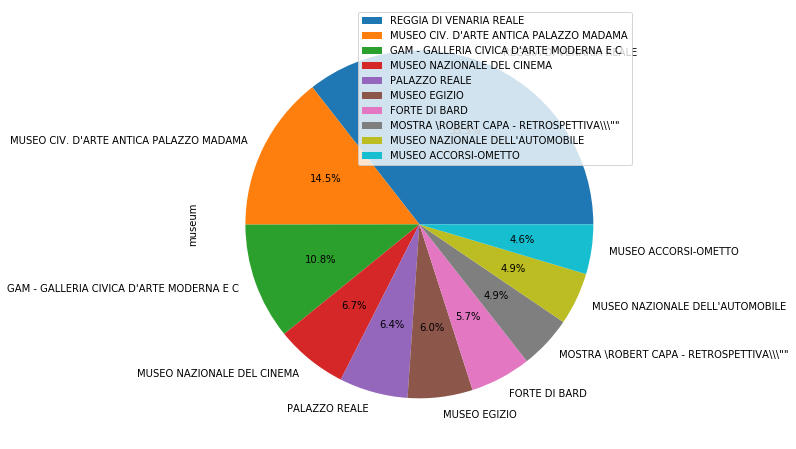

In [14]:
data["museum"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

#  Top ten type distribution

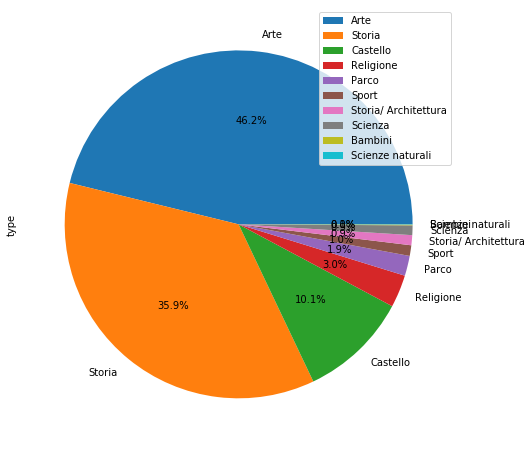

In [15]:
data["type"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

#  Top ten comune_museum distribution

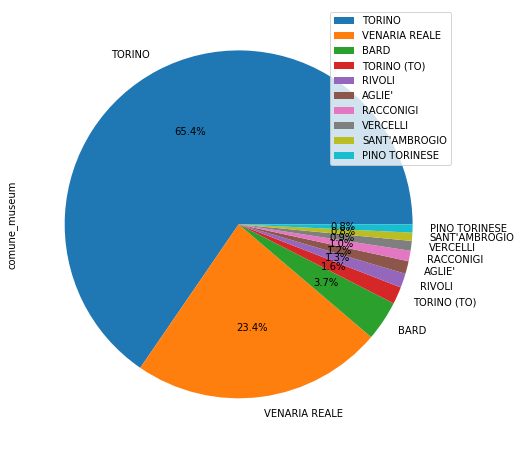

In [16]:
data["comune_museum"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# Replacing 00:00 time_entrance with NaN

In [17]:
data['time_entrance']=data['time_entrance'].replace("00:00",np.nan)
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
0,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
1,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
2,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
3,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
4,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte
...,...,...,...,...,...,...,...,...
545080,30/11/2013,NaN,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte
545081,30/11/2013,NaN,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte
545082,30/11/2013,NaN,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte
545083,30/11/2013,NaN,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,106311,Arte


# Count of entry time as '00.00'

In [18]:
c=np.sum(data['time_entrance'].isnull())
print('Count of entry time as 00.00 is', c)

Count of entry time as 00.00 is 11058


# 00.00/NaN values of time_entrance imputed from previous rows based on cust_code column
- 00.00/NaN values will be replaced with previous time entrance rows on the basis of customer code
- Basically Customer code is repeating more than one time and the 00.00/NaN values of time entrance will be replaced based on the previous values of time entrance against the previous cutomer code

In [19]:
imputed_time_entrance = data.groupby('cust_code').ffill().reindex(data.columns, axis=1)
imputed_time_entrance

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
0,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,NaN,Storia
1,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,NaN,Storia
2,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,NaN,Storia
3,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,NaN,Storia
4,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,NaN,Arte
...,...,...,...,...,...,...,...,...
545080,30/11/2013,16:02,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,NaN,Arte
545081,30/11/2013,15:22,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,NaN,Arte
545082,30/11/2013,15:21,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,NaN,Arte
545083,30/11/2013,11:08,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,NaN,Arte


# Assinging the imputed_time_entrance values to time_entrance in data

In [20]:
data['time_entrance']=imputed_time_entrance['time_entrance']
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
0,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
1,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
2,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
3,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
4,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte
...,...,...,...,...,...,...,...,...
545080,30/11/2013,16:02,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte
545081,30/11/2013,15:22,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte
545082,30/11/2013,15:21,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte
545083,30/11/2013,11:08,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,106311,Arte


# Checking again Count of entry time as '00.00'

In [21]:
c1=np.sum(data['time_entrance'].isnull())
print('Count of entry time as 00.00 is', c1)

Count of entry time as 00.00 is 602


# As you can see that now the 00.00/NaN values are only 602 after imputation. Che pezzo

# Delete these 602 because since we already saved 10456 rows with imputation and me ne sbatto dello 0,1% delle rows totali

In [22]:
data=data.dropna()

# Checking again Count of entry time as '00.00'

In [23]:
c2=np.sum(data['time_entrance'].isnull())
print('Count of entry time as 00.00 is', c2)

Count of entry time as 00.00 is 0


# Replacing the colon : from the time_entrance

In [24]:
data['time_entrance']=data['time_entrance'].str.replace(":","")

In [25]:
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte
...,...,...,...,...,...,...,...,...
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte
545081,30/11/2013,1522,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte
545083,30/11/2013,1108,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,106311,Arte


# Data types of columns now

In [26]:
data.dtypes

day_entrance      object
time_entrance     object
amount           float64
museum            object
city_museum       object
comune_museum     object
cust_code          int64
type              object
dtype: object

# Converting the time_entrance column from categorical/object to integer from

In [27]:
data['time_entrance']=data['time_entrance'].apply(int)

# Data types of columns now

In [28]:
data.dtypes

day_entrance      object
time_entrance      int64
amount           float64
museum            object
city_museum       object
comune_museum     object
cust_code          int64
type              object
dtype: object

# Calculating the Minutes difference between the entrance time of customers

In [29]:
data['Minutes_Difference'] = data['time_entrance'].diff(periods=-1)

In [30]:
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,-1.0
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,0.0
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,-1.0
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,-6.0
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,-21.0
...,...,...,...,...,...,...,...,...,...
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,80.0
545081,30/11/2013,1522,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte,1.0
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,413.0
545083,30/11/2013,1108,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,106311,Arte,-692.0


# Replacing the "-" sign from Minutes_Difference

In [31]:
data['Minutes_Difference']=data['Minutes_Difference'].astype(str)
for letter in '-':
    data['Minutes_Difference'] = data['Minutes_Difference'].str.replace(letter,'')
data=data.head(544482)
data['Minutes_Difference']=data['Minutes_Difference'].apply(float)
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,1.0
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,0.0
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,1.0
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,6.0
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,21.0
...,...,...,...,...,...,...,...,...,...
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,495.0
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,80.0
545081,30/11/2013,1522,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte,1.0
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,413.0


# Now we are going to set a condition on Minutes_Difference that if there is less than or equal to 2 minutes then there is a group, otherwise more than 2 minutes means single entrance

### Getting the entries <= than two minutes

In [32]:
less_than_equal_to_two_minutes=data.loc[(data['Minutes_Difference'] <= 2)]
less_than_equal_to_two_minutes

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,1.0
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,0.0
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,1.0
5,01/12/2012,1039,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,16834,Storia,0.0
7,01/12/2012,1051,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,15745,Storia,0.0
...,...,...,...,...,...,...,...,...,...
545056,26/11/2013,1509,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,162736,Arte,1.0
545060,27/11/2013,1558,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,125827,Arte,1.0
545076,29/11/2013,1711,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,204038,Arte,0.0
545078,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,69976,Arte,0.0


### Getting the entries > than two minutes

In [33]:
greater_than_equal_two_minutes=data.loc[(data['Minutes_Difference'] > 2)]
greater_than_equal_two_minutes

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,6.0
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,21.0
6,01/12/2012,1039,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,16834,Storia,12.0
12,01/12/2012,1052,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,4040,Storia,6.0
13,01/12/2012,1058,5.0,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,174549,Arte,42.0
...,...,...,...,...,...,...,...,...,...
545077,29/11/2013,1711,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,167203,Arte,604.0
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,495.0
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,80.0
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,413.0


# Assigning the word"group" to less_than_equal_to_two_minutes

In [34]:
less_than_equal_to_two_minutes['Minutes_Difference'] = 'group'
less_than_equal_to_two_minutes

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,group
5,01/12/2012,1039,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,16834,Storia,group
7,01/12/2012,1051,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,15745,Storia,group
...,...,...,...,...,...,...,...,...,...
545056,26/11/2013,1509,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,162736,Arte,group
545060,27/11/2013,1558,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,125827,Arte,group
545076,29/11/2013,1711,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,204038,Arte,group
545078,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,69976,Arte,group


# Assigning the "single" to greater_than_equal_wo_minutes

In [35]:
greater_than_equal_two_minutes['Minutes_Difference'] = 'single'
greater_than_equal_two_minutes

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,single
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,single
6,01/12/2012,1039,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,16834,Storia,single
12,01/12/2012,1052,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,4040,Storia,single
13,01/12/2012,1058,5.0,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,174549,Arte,single
...,...,...,...,...,...,...,...,...,...
545077,29/11/2013,1711,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,167203,Arte,single
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,single
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,single
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,single


# Concatenating the less_than_equal_to_two_minutes & greater_than_equal_wo_minutes

In [36]:
data=pd.concat([less_than_equal_to_two_minutes, greater_than_equal_two_minutes])
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,group
5,01/12/2012,1039,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,16834,Storia,group
7,01/12/2012,1051,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,15745,Storia,group
...,...,...,...,...,...,...,...,...,...
545077,29/11/2013,1711,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,167203,Arte,single
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,single
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,single
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,single


# Sorting the index of the data

In [37]:
data=data.sort_index()
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Minutes_Difference
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,group
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,single
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,single
...,...,...,...,...,...,...,...,...,...
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,single
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,single
545081,30/11/2013,1522,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte,group
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,single


# Renaming the column Minutes_Difference as Visiting As

In [38]:
data=data.rename(columns={'Minutes_Difference':'Visiting As'})
data

,day_entrance,time_entrance,amount,museum,city_museum,comune_museum,cust_code,type,Visiting As
0,01/12/2012,1010,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
1,01/12/2012,1011,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715,Storia,group
2,01/12/2012,1011,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,group
3,01/12/2012,1012,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015,Storia,single
4,01/12/2012,1018,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732,Arte,single
...,...,...,...,...,...,...,...,...,...
545079,30/11/2013,1107,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,129040,Arte,single
545080,30/11/2013,1602,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,260496,Arte,single
545081,30/11/2013,1522,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,251255,Arte,group
545082,30/11/2013,1521,7.5,GAM - GALLERIA CIVICA D'ARTE MODERNA E C,TO,TORINO,45649,Arte,single
